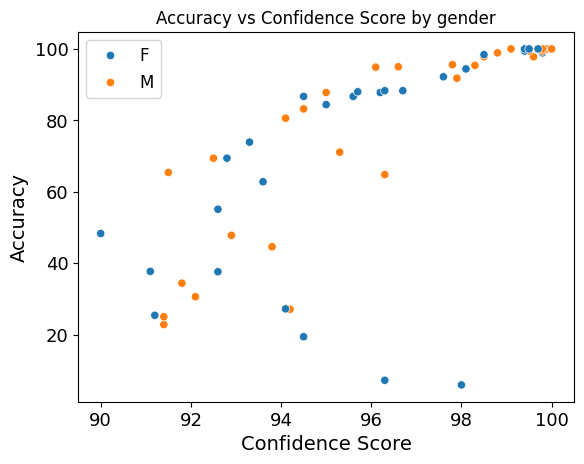

In [ ]:
import sys
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_age_sex(csv_file):
# Load the CSV data
    df = pd.read_csv(csv_file)
    # Create the scatter plot
    sns.scatterplot(data=df, y='accuracy', x='age', hue='sex')

    # Add labels and title
    plt.ylabel('Accuracy')
    plt.xlabel('Age')
    plt.title('Accuracy vs Age by Sex')

    # Show the plot
    plt.savefig(csv_file.replace('.csv', '_age_sex.png'))
    plt.close()

def plot_age_sex_avg5(csv_file):
    df = pd.read_csv(csv_file)
    # Create the scatter plot
    sns.scatterplot(data=df, y='accuracy_avg', x='age', hue='sex')

    # Add labels and title
    plt.ylabel('Accuracy', fontsize=14)
    plt.xlabel('Age', fontsize=14)
    plt.title('Accuracy vs Age by Sex')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(fontsize=12)
    
    # Show the plot
    plt.savefig(csv_file.replace('.csv', '_age_sex_avg5.png'))
    plt.close()
    
def plot_df_acc_scatter(df, x_col, x_label, group='sex'):
    # Create the scatter plot
    palette = {'HC': 'green', 'PD': 'blue'}
    if group == 'sex':
        df['sex'] = df['sex'].replace({'V': 'F'})

        sns.scatterplot(data=df, y='accuracy_avg', x=x_col, hue=group)
        group = 'gender'
        # Before plotting, update the 'sex' column: replace 'V' with 'F'
    else:
        sns.scatterplot(data=df, y='accuracy_avg', x=x_col, hue=group, palette=palette)

    # Add labels and title
    plt.ylabel('Accuracy', fontsize=14)
    plt.xlabel(x_label, fontsize=14)
    plt.title('Accuracy vs ' + x_label + ' by ' + group)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    plt.legend(fontsize=12)
    
    # Show the plot


def plot_acc_distribution(csv_file):
    # Load data
    df = pd.read_csv(csv_file)
    # Create distribution plot
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='accuracy', bins=10)

    # Customize plot
    plt.xlabel('Accuracy')
    plt.ylabel('Count')
    plt.title('Distribution of Accuracy Scores')

    # Save plot
    plt.savefig(csv_file.replace('.csv', '_acc_distribution.png'))
    plt.close()


def plot_age_group(csv_file):
    df = pd.read_csv(csv_file)
    # Update 'id_prefix' by ensuring 'fold_or_id' is a string
    df['id_prefix'] = df['fold_or_id'].astype(str).str[:2]
    # Map id_prefix to Group
    df['Group'] = df['id_prefix'].map({'21': 'HC', '22': 'PD'})

    # Define the color palette
    palette = {'HC': 'green', 'PD': 'blue'}

    # Create the scatter plot
    sns.scatterplot(data=df, x='accuracy', y='age', hue='Group', palette=palette)

    # Add labels and title
    plt.xlabel('Accuracy')
    plt.ylabel('Age')
    plt.title('Accuracy vs Age by Group')

    # Save the plot
    plt.savefig(csv_file.replace('.csv', '_age_group.png'))
    plt.close()

def plot_pd_relate(csv_file):
    
    demogr_df = pd.read_csv('dummy_demogr_perpp.txt', sep='\t', dtype={'participantnummer': str})
    df = pd.read_csv(csv_file)
    # Ensure 'fold_or_id' is a string
    df['fold_or_id'] = df['fold_or_id'].astype(str)

    # Merge ROMPscore and TimeSinceDiagnosis_months based on participant ID
    df = df.merge(
        demogr_df[['participantnummer', 'ROMPscore', 'TimeSinceDiagnosis_months', 'MOCA']],
        left_on='fold_or_id',
        right_on='participantnummer',
        how='left'
    )
    # print(df)
    # Replace NaN values with 'NA'
    df['ROMPscore'] = df['ROMPscore'].fillna('NA')
    df['TimeSinceDiagnosis_months'] = df['TimeSinceDiagnosis_months'].fillna('NA')

    # Optionally, drop 'participantnummer' column if not needed
    df = df.drop('participantnummer', axis=1)
    
    plot_df_acc_scatter(df, 'MOCA', "MOCA")
    plt.savefig(csv_file.replace('.csv', '_age_' + "MOCA" + '_avg5.png'))
    plt.close()
    # Create the scatter plot
    plot_df_acc_scatter(df[df['fold_or_id'].astype(int) > 2200], 'ROMPscore', "ROMP")
    plt.savefig(csv_file.replace('.csv', '_age_' + "ROMP" + '_avg5.png'))
    plt.close()

    plot_df_acc_scatter(df[df['fold_or_id'].astype(int) > 2200], 'TimeSinceDiagnosis_months', "TAD")
    plt.savefig(csv_file.replace('.csv', '_age_' + "TAD" + '_avg5.png'))
    plt.close()
    
    corr_moca = df['accuracy_avg'].corr(df['MOCA'])
    corr_romp = df[df['fold_or_id'].astype(int) > 2200]['accuracy_avg'].corr(df['ROMPscore'])
    corr_tad = df[df['fold_or_id'].astype(int) > 2200]['accuracy_avg'].corr(df['TimeSinceDiagnosis_months'])
    print("Correlation between accuracy_avg and MOCA:", corr_moca)
    print("Correlation between accuracy_avg and ROMPscore:", corr_romp)
    print("Correlation between accuracy_avg and TimeSinceDiagnosis_months:", corr_tad)



if __name__ == '__main__':
    csv_file = 'res_avg5/Multimodal_WS_tt_balanced_merged_random_avg5.csv'
    df = pd.read_csv(csv_file)

    # plot_age_sex_avg5(sys.argv[1])
    # plot_pd_relate(csv_file)
    # df['id_prefix'] = df['fold_or_id'].astype(str).str[:2]
    # # Map id_prefix to Group
    # df['Group'] = df['id_prefix'].map({'21': 'HC', '22': 'PD'})
    # plot_df_acc_scatter(df, 'age', "Age")
    # plt.savefig(csv_file.replace('.csv', 'acc_age_bysex.png'))
    # plt.close()
    
    corr_CS = df['accuracy_avg'].corr(df['average_confidence_all'])
    plot_df_acc_scatter(df, 'average_confidence_all', 'Confidence Score', group='sex')
    plt.savefig(csv_file.replace('.csv', '_acc_CS_bygender.png'))
    # print("Correlation between accuracy_avg and CS:", corr_CS)
    # folderpath = sys.argv[1]
    # plot_age_sex(os.path.join(folderpath, 'test_results_by_speaker.csv'))
    # plot_age_sex(os.path.join(folderpath, 'test_results_by_speaker_hc.csv'))
    # plot_age_sex(os.path.join(folderpath, 'test_results_by_speaker_pd.csv'))
    # plot_acc_distribution(os.path.join(folderpath, 'test_results_by_speaker.csv'))
    # plot_age_group(os.path.join(folderpath, 'test_results_by_speaker.csv'))
    # plot_pd_relate(os.path.join(folderpath, 'test_results_by_speaker_pd.csv'))

